In [1]:
from google.colab import files
x = files.upload()

Saving DataSetSplitted.zip to DataSetSplitted.zip


In [2]:
! unzip DataSetSplitted.zip

Archive:  DataSetSplitted.zip
   creating: DataSet/
   creating: DataSet/test/
   creating: DataSet/test/human/
  inflating: DataSet/test/human/Angelina-Jolie-100x130cm-2013.jpg  
  inflating: DataSet/test/human/b53d30e509b44bfc5f7bf3d3a03cc000fcd50623.jpeg  
  inflating: DataSet/test/human/dam-images-daily-2014-11-martin-schoeller-portraits-martin-schoeller-portraits-02.jpg  
  inflating: DataSet/test/human/default.jpg  
  inflating: DataSet/test/human/image24.jpeg  
  inflating: DataSet/test/human/image32.jpeg  
  inflating: DataSet/test/human/image33.jpeg  
  inflating: DataSet/test/human/images102.jpg  
  inflating: DataSet/test/human/images113.jpg  
  inflating: DataSet/test/human/images114.jpg  
  inflating: DataSet/test/human/images147.jpg  
  inflating: DataSet/test/human/images148.jpg  
  inflating: DataSet/test/human/images149.jpg  
  inflating: DataSet/test/human/images184.jpg  
  inflating: DataSet/test/human/images185.jpg  
  inflating: DataSet/test/human/images193.jpg  
 

In [3]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = my_generator.flow_from_directory( './DataSet/train/', target_size=(150, 150), batch_size=4, class_mode='binary')
valid_generator = my_generator.flow_from_directory( './DataSet/validate/', target_size=(150, 150), batch_size=4, class_mode='binary')
test_generator = my_generator.flow_from_directory('./DataSet/test/', target_size=(150, 150), batch_size=4, class_mode='binary')

Found 738 images belonging to 2 classes.
Found 156 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [6]:
EPOCHS = 100
checkpoint_filepath = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_loss', verbose=1,mode='min',save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)
model = Sequential()
model.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( BatchNormalization())
model.add( MaxPooling2D(4 ,4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPooling2D(4, 4) )
model.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model.add( Flatten() )
model.add( Dense( 10, activation = 'relu' ) )
model.add( Dense( 1, activation = 'sigmoid' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                        

In [7]:
model.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks = earlystopping)

Epoch 1/100
173/185 [===========================>..] - ETA: 1s - loss: 0.5373 - accuracy: 0.7159

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 26s 136ms/step - loss: 0.5290 - accuracy: 0.7222 - val_loss: 0.6651 - val_accuracy: 0.5128
Epoch 2/100
185/185 [==============================] - 25s 136ms/step - loss: 0.3171 - accuracy: 0.8794 - val_loss: 0.5881 - val_accuracy: 0.6538
Epoch 3/100
185/185 [==============================] - 25s 136ms/step - loss: 0.2417 - accuracy: 0.9092 - val_loss: 1.0570 - val_accuracy: 0.6346
Epoch 4/100
185/185 [==============================] - 25s 136ms/step - loss: 0.1955 - accuracy: 0.9255 - val_loss: 0.2651 - val_accuracy: 0.8846
Epoch 5/100
185/185 [==============================] - 25s 136ms/step - loss: 0.1636 - accuracy: 0.9377 - val_loss: 0.6599 - val_accuracy: 0.7821
Epoch 6/100
185/185 [==============================] - 25s 136ms/step - loss: 0.1396 - accuracy: 0.9512 - val_loss: 0.3198 - val_accuracy: 0.8782
Epoch 7/100
185/185 [==============================] - 25s 135ms/step - loss: 0.0905 - accuracy: 0.9607 - val_loss: 0.2857 - val_accurac

In [8]:
model.evaluate(test_generator)

36/36 [==============================] - 4s 99ms/step - loss: 0.7859 - accuracy: 0.8750


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.7858773469924927, 0.875]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

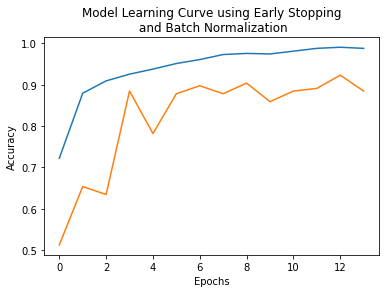

In [9]:
print(history.history.keys())
keyList = list(history.history.keys())
plt.plot(history.history[keyList[1]],label = "Training accuracy" )
plt.plot(history.history[keyList[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [10]:
model1 = Sequential()
model1.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model1.add( MaxPooling2D(4 ,4) )
model1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model1.add( MaxPooling2D(4, 4) )
model1.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model1.add( Flatten() )
model1.add( Dense( 10, activation = 'relu' ) )
model1.add(Dropout(0.5))
model1.add( Dense( 1, activation = 'sigmoid' ) )
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 8)           3208      
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [11]:
model1.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history1 = model1.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
 17/185 [=>............................] - ETA: 22s - loss: 0.7057 - accuracy: 0.4706

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 21s 107ms/step - loss: 0.6877 - accuracy: 0.5379 - val_loss: 0.7421 - val_accuracy: 0.4936
Epoch 2/100
185/185 [==============================] - 20s 107ms/step - loss: 0.6104 - accuracy: 0.6626 - val_loss: 0.5582 - val_accuracy: 0.7244
Epoch 3/100
185/185 [==============================] - 20s 106ms/step - loss: 0.4784 - accuracy: 0.7669 - val_loss: 0.3905 - val_accuracy: 0.8205
Epoch 4/100
185/185 [==============================] - 20s 106ms/step - loss: 0.4060 - accuracy: 0.8211 - val_loss: 0.3413 - val_accuracy: 0.8718
Epoch 5/100
185/185 [==============================] - 20s 106ms/step - loss: 0.3461 - accuracy: 0.8537 - val_loss: 0.3558 - val_accuracy: 0.8462
Epoch 6/100
185/185 [==============================] - 20s 107ms/step - loss: 0.3294 - accuracy: 0.8875 - val_loss: 0.3342 - val_accuracy: 0.8590
Epoch 7/100
185/185 [==============================] - 20s 106ms/step - loss: 0.3172 - accuracy: 0.8889 - val_loss: 0.3468 - val_accurac

In [12]:
model1.evaluate(test_generator)

33/36 [==========================>...] - ETA: 0s - loss: 0.4325 - accuracy: 0.8712

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 3s 96ms/step - loss: 0.4170 - accuracy: 0.8681


[0.41700777411460876, 0.8680555820465088]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

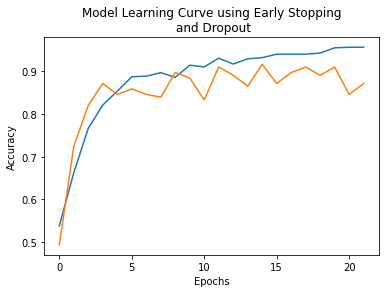

In [13]:
print(history1.history.keys())
keyList = list(history1.history.keys())
plt.plot(history1.history[keyList[1]],label = "Training accuracy" )
plt.plot(history1.history[keyList[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [14]:
model2 = Sequential()
model2.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model2.add( MaxPooling2D(4 ,4) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPooling2D(4, 4) )
model2.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same" , kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001) ) )
model2.add( Flatten() )
model2.add( Dense( 10, activation = 'relu' ) )
model2.add( Dense( 1, activation = 'sigmoid' ) )
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           3208      
                                                                 
 flatten_2 (Flatten)         (None, 512)              

In [15]:
model2.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history2 = model2.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
 14/185 [=>............................] - ETA: 20s - loss: 0.7668 - accuracy: 0.5357

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 21s 109ms/step - loss: 0.6437 - accuracy: 0.6301 - val_loss: 0.5706 - val_accuracy: 0.6795
Epoch 2/100
185/185 [==============================] - 20s 110ms/step - loss: 0.4776 - accuracy: 0.7981 - val_loss: 0.3425 - val_accuracy: 0.8526
Epoch 3/100
185/185 [==============================] - 20s 110ms/step - loss: 0.3787 - accuracy: 0.8442 - val_loss: 0.3058 - val_accuracy: 0.8846
Epoch 4/100
185/185 [==============================] - 20s 110ms/step - loss: 0.3340 - accuracy: 0.8604 - val_loss: 0.3052 - val_accuracy: 0.8782
Epoch 5/100
185/185 [==============================] - 20s 108ms/step - loss: 0.2899 - accuracy: 0.8889 - val_loss: 0.3789 - val_accuracy: 0.8397
Epoch 6/100
185/185 [==============================] - 20s 110ms/step - loss: 0.2655 - accuracy: 0.8997 - val_loss: 0.2979 - val_accuracy: 0.8846
Epoch 7/100
185/185 [==============================] - 20s 109ms/step - loss: 0.2240 - accuracy: 0.9187 - val_loss: 0.3224 - val_accurac

In [16]:
model2.evaluate(test_generator)

 8/36 [=====>........................] - ETA: 1s - loss: 0.3871 - accuracy: 0.8438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


36/36 [==============================] - 4s 99ms/step - loss: 0.5569 - accuracy: 0.8472


[0.5569155216217041, 0.8472222089767456]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

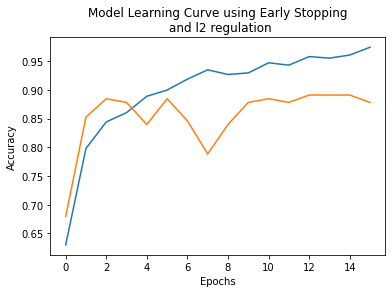

In [17]:
print(history2.history.keys())
keyList = list(history2.history.keys())
plt.plot(history2.history[keyList[1]],label = "Training accuracy" )
plt.plot(history2.history[keyList[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping\n and l2 regulation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [18]:
model3 = Sequential()
model3.add( Conv2D( 32, (2, 2 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model3.add( MaxPooling2D(4 ,4) )
model3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model3.add( MaxPooling2D(4, 4) )
model3.add( Conv2D( 8, ( 5, 5 ), activation = 'relu',padding="same"  ) )
model3.add( Flatten() )
model3.add( Dense( 10, activation = 'relu' ) )
model3.add( Dense( 1, activation = 'sigmoid' ) )
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 35, 35, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 8)           3208      
                                                                 
 flatten_3 (Flatten)         (None, 512)              

In [19]:
model3.compile( optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = [ 'accuracy' ] )
history3 = model3.fit( train_generator, validation_data = valid_generator, epochs = 100, batch_size = 64, callbacks=earlystopping)

Epoch 1/100
125/185 [===================>..........] - ETA: 6s - loss: 0.6865 - accuracy: 0.5320

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


185/185 [==============================] - 22s 112ms/step - loss: 0.6765 - accuracy: 0.5705 - val_loss: 0.6194 - val_accuracy: 0.6410
Epoch 2/100
185/185 [==============================] - 21s 111ms/step - loss: 0.5065 - accuracy: 0.7493 - val_loss: 0.8274 - val_accuracy: 0.5769
Epoch 3/100
185/185 [==============================] - 20s 110ms/step - loss: 0.4062 - accuracy: 0.8252 - val_loss: 0.3541 - val_accuracy: 0.8141
Epoch 4/100
185/185 [==============================] - 20s 110ms/step - loss: 0.3428 - accuracy: 0.8618 - val_loss: 0.3484 - val_accuracy: 0.8397
Epoch 5/100
185/185 [==============================] - 21s 111ms/step - loss: 0.3025 - accuracy: 0.8672 - val_loss: 0.2983 - val_accuracy: 0.8846
Epoch 6/100
185/185 [==============================] - 20s 109ms/step - loss: 0.2695 - accuracy: 0.8970 - val_loss: 0.3085 - val_accuracy: 0.8462
Epoch 7/100
185/185 [==============================] - 20s 108ms/step - loss: 0.2513 - accuracy: 0.8957 - val_loss: 0.5964 - val_accurac

In [20]:
model3.evaluate(test_generator)

36/36 [==============================] - 3s 92ms/step - loss: 0.5309 - accuracy: 0.8333


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.5309111475944519, 0.8333333134651184]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

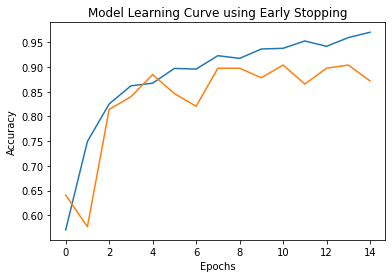

In [21]:
print(history3.history.keys())
keyList = list(history3.history.keys())
plt.plot(history3.history[keyList[1]],label = "Training accuracy" )
plt.plot(history3.history[keyList[3]], label = "Validation accuracy" )
plt.title("Model Learning Curve using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")